In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# You can only unzip a zipped tuple once before it is removed 
# from the computer's memory. Make sure you unzip the latitudes 
# and longitudes into the coordinates list before moving on.

In [5]:
print(coordinates)

[(-2.4741047744579845, 146.32781942062667), (-50.21558135964252, 10.409160401025787), (34.18317367355294, -159.86996685671346), (-29.50058061925199, -143.5857288171738), (-73.40391017498516, 165.9602344616157), (60.60894400738928, 81.57153473471897), (-59.44572002667793, -171.37082580902103), (-83.23011365682261, 175.8004166687673), (44.22457573920386, 166.92829860568241), (45.24160210743614, -109.60906300697272), (88.60364247615175, -5.520930534586853), (76.0022194701231, -10.558790038002229), (-80.46503283908939, 172.0234307320144), (4.619648896795439, -133.13321829155606), (61.97771621110749, 69.99772769238831), (-51.702593294954625, 65.56277124983058), (-66.50143032292588, -64.54016919771132), (-6.984531716744399, 122.6575819556906), (30.612374574600736, 91.30538140494343), (-83.5351466510016, -119.21977184602926), (-69.41031535533355, -33.99945367167891), (59.213487476416475, -19.21955678908901), (37.11505238403939, -48.96248960767011), (-66.42777443479416, 31.090900984161692), (2

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

### Import Dependencies, and Initialize Empty List and Counters

In [8]:
# Import the requests library.
import requests

In [9]:
# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

In [12]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | kargasok
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | cody
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | husavik
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | gornopravdinsk
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | maumere
Processing Record 17 of Set 1 | lasa
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | vestmannaeyjar
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | aswan
Processing Rec

Processing Record 39 of Set 4 | trat
Processing Record 40 of Set 4 | talcahuano
Processing Record 41 of Set 4 | la rioja
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | kiunga
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | bowen
Processing Record 46 of Set 4 | te anau
Processing Record 47 of Set 4 | grand-santi
Processing Record 48 of Set 4 | birao
Processing Record 49 of Set 4 | montorio al vomano
Processing Record 50 of Set 4 | normandin
Processing Record 1 of Set 5 | iqaluit
Processing Record 2 of Set 5 | okhotsk
Processing Record 3 of Set 5 | meulaboh
Processing Record 4 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | verkhovazhye
Processing Record 7 of Set 5 | panalingaan
Processing Record 8 of Set 5 | bara
Processing Record 9 of Set 5 | sorland
Processing Record 10 of Set 5 | yumen
Processing Record 11 of Set 5 | lompoc
Processing Record 12 of Set 5 | minab
Proce

Processing Record 30 of Set 8 | binghamton
Processing Record 31 of Set 8 | antofagasta
Processing Record 32 of Set 8 | awbari
Processing Record 33 of Set 8 | la sarre
Processing Record 34 of Set 8 | salalah
Processing Record 35 of Set 8 | marcona
City not found. Skipping...
Processing Record 36 of Set 8 | vestmanna
Processing Record 37 of Set 8 | verkhnyaya inta
Processing Record 38 of Set 8 | mazatlan
Processing Record 39 of Set 8 | gisborne
Processing Record 40 of Set 8 | ostersund
Processing Record 41 of Set 8 | saint-jean-de-braye
Processing Record 42 of Set 8 | fenoarivo
Processing Record 43 of Set 8 | yurga
Processing Record 44 of Set 8 | puerto escondido
Processing Record 45 of Set 8 | tessalit
Processing Record 46 of Set 8 | coahuayana
Processing Record 47 of Set 8 | muir of ord
Processing Record 48 of Set 8 | berkak
Processing Record 49 of Set 8 | kununurra
Processing Record 50 of Set 8 | trinidad
Processing Record 1 of Set 9 | kiruna
Processing Record 2 of Set 9 | vitim
Proce

Processing Record 20 of Set 12 | kalmunai
Processing Record 21 of Set 12 | ismailia
Processing Record 22 of Set 12 | zemetchino
Processing Record 23 of Set 12 | nezhinka
Processing Record 24 of Set 12 | urengoy
Processing Record 25 of Set 12 | susanville
Processing Record 26 of Set 12 | wonthaggi
Processing Record 27 of Set 12 | kibaya
Processing Record 28 of Set 12 | grand gaube
Processing Record 29 of Set 12 | primorsk
Processing Record 30 of Set 12 | bukachacha
Processing Record 31 of Set 12 | lapithos
Processing Record 32 of Set 12 | oranjemund
Processing Record 33 of Set 12 | morros
Processing Record 34 of Set 12 | shuangcheng
Processing Record 35 of Set 12 | muana
Processing Record 36 of Set 12 | cordoba
Processing Record 37 of Set 12 | karachi
Processing Record 38 of Set 12 | aflu
City not found. Skipping...
Processing Record 39 of Set 12 | kazerun
Processing Record 40 of Set 12 | margate
Processing Record 41 of Set 12 | tambacounda
Processing Record 42 of Set 12 | bokspits
City

In [15]:
len(city_data)

561

### DataFrame of City Weather Data

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lorengau,-2.0226,147.2712,80.89,83,37,10.13,PG,2021-08-14 14:31:43
1,Hermanus,-34.4187,19.2345,61.81,65,0,15.88,ZA,2021-08-14 14:31:43
2,Kapaa,22.0752,-159.3190,79.12,90,75,13.80,US,2021-08-14 14:31:44
3,Mataura,-46.1927,168.8643,45.48,82,100,6.69,NZ,2021-08-14 14:31:44
4,Bluff,-46.6000,168.3333,45.81,76,96,25.28,NZ,2021-08-14 14:31:44
5,Kargasok,59.0556,80.8572,58.62,87,95,5.14,RU,2021-08-14 14:31:45
6,Vaini,-21.2000,-175.2000,66.36,82,20,5.75,TO,2021-08-14 14:28:30
7,Nikolskoye,59.7035,30.7861,71.49,83,92,8.97,RU,2021-08-14 14:31:45
8,Cody,44.5263,-109.0565,71.80,55,1,0.00,US,2021-08-14 14:31:45
9,Husavik,66.0449,-17.3389,57.11,94,100,11.41,IS,2021-08-14 14:31:45


In [17]:
# City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lorengau,PG,2021-08-14 14:31:43,-2.0226,147.2712,80.89,83,37,10.13
1,Hermanus,ZA,2021-08-14 14:31:43,-34.4187,19.2345,61.81,65,0,15.88
2,Kapaa,US,2021-08-14 14:31:44,22.0752,-159.3190,79.12,90,75,13.80
3,Mataura,NZ,2021-08-14 14:31:44,-46.1927,168.8643,45.48,82,100,6.69
4,Bluff,NZ,2021-08-14 14:31:44,-46.6000,168.3333,45.81,76,96,25.28
5,Kargasok,RU,2021-08-14 14:31:45,59.0556,80.8572,58.62,87,95,5.14
6,Vaini,TO,2021-08-14 14:28:30,-21.2000,-175.2000,66.36,82,20,5.75
7,Nikolskoye,RU,2021-08-14 14:31:45,59.7035,30.7861,71.49,83,92,8.97
8,Cody,US,2021-08-14 14:31:45,44.5263,-109.0565,71.80,55,1,0.00
9,Husavik,IS,2021-08-14 14:31:45,66.0449,-17.3389,57.11,94,100,11.41


In [19]:
# Create a new folder called "weather_data." Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Data for Plotting


In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/14/21'

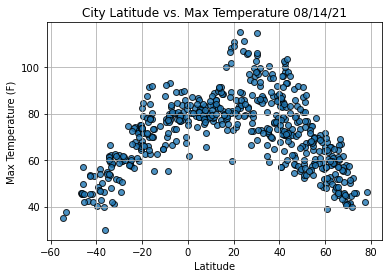

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Plot Latitude vs. Humidity

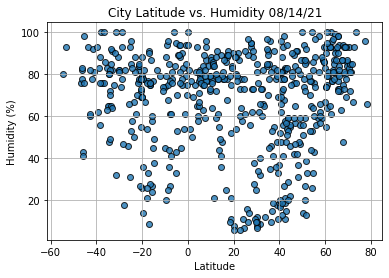

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Plot Latitude vs. Cloudiness

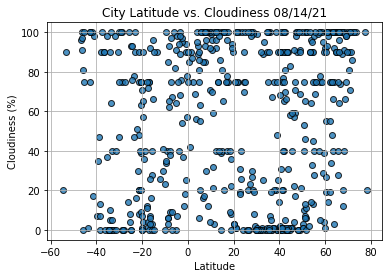

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### Plot Latitude vs. Wind Speed

ValueError: x and y must be the same size

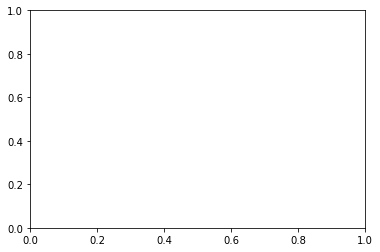

In [51]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Linear Regression to Find the Relationship Between Variables

In [ ]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [52]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [53]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [54]:
# If you don't want to calculate one of these values 
# but do not add it inside the parentheses, you'll get 
# a ValueError: too many values to unpack.

# To prevent this error, add a comma and underscore 
# for each value you don't want to calculate.

# For instance, if you don't want to print out the 
# p-value and the standard error, write your function as 
# (slope, intercept, r_value, _, _) = linregress(x, y).

In [55]:
# Calculate the regression line "y values" from the slope and intercept.
# y = mx + b
regress_values = [(lat * slope + intercept) for lat in lats]

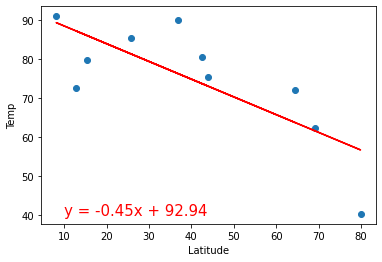

In [56]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

## Correlation Between Latitude and Maximum Temperature

### Linear Regression Function


In [57]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line, y=mx+b.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Hemisphere DataFrames


In [58]:
# present all the information at index 13 of the city_data_df DataFrame
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-08-14 14:31:46
Lat                         -54.8
Lng                         -68.3
Max Temp                    35.22
Humidity                       80
Cloudiness                     20
Wind Speed                    0.0
Name: 13, dtype: object

In [59]:
# filter based on a value of a row, for latitudes greater than or equal to 0 for equator.
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
556     True
557    False
558     True
559    False
560     True
Name: Lat, Length: 561, dtype: bool

In [60]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Kapaa,US,2021-08-14 14:31:44,22.0752,-159.3190,79.12,90,75,13.80
5,Kargasok,RU,2021-08-14 14:31:45,59.0556,80.8572,58.62,87,95,5.14
7,Nikolskoye,RU,2021-08-14 14:31:45,59.7035,30.7861,71.49,83,92,8.97
8,Cody,US,2021-08-14 14:31:45,44.5263,-109.0565,71.80,55,1,0.00
9,Husavik,IS,2021-08-14 14:31:45,66.0449,-17.3389,57.11,94,100,11.41


In [61]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [62]:
# Now we can perform linear regression on latitude and 
# maximum temperature from each hemisphere DataFrame.

### Linear Regression on the Maximum Temperature for the Northern Hemisphere

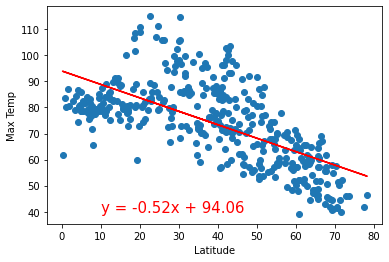

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

### Linear Regression on the Maximum Temperature for the Southern Hemisphere


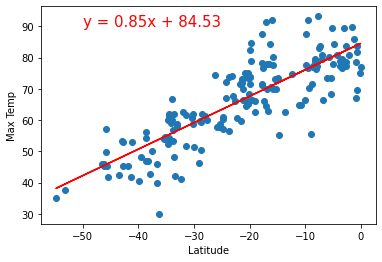

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

## Correlation Between Latitude and Percent Humidity



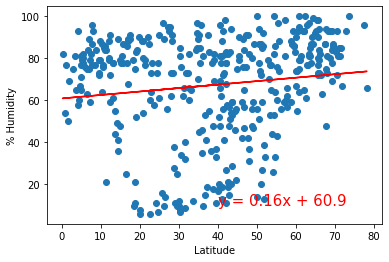

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',
                       (40,10))

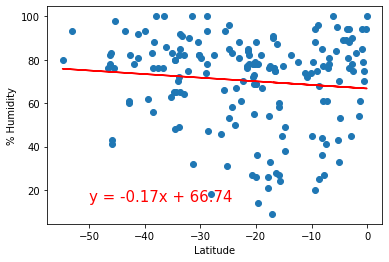

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

### Linear Regression on the Percent Cloudiness for the Northern Hemisphere

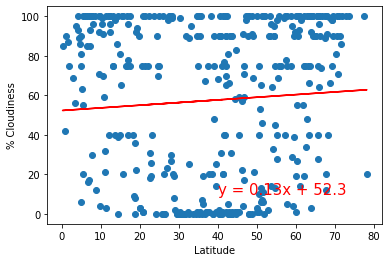

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 
                       '% Cloudiness',
                       (40,10))

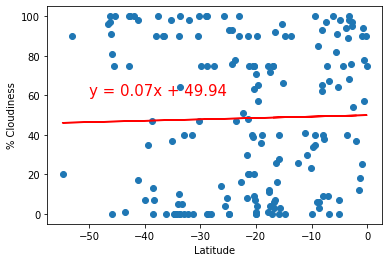

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

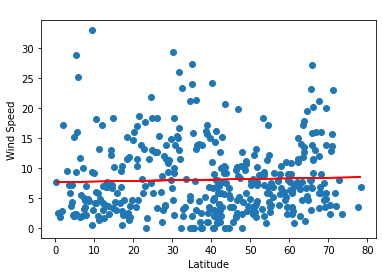

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


### Correlation Between Latitude and Wind Speed

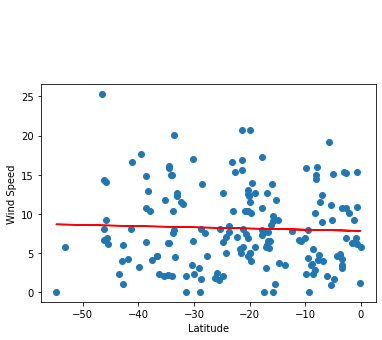

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

## Google Maps and Places API